In [1]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0)

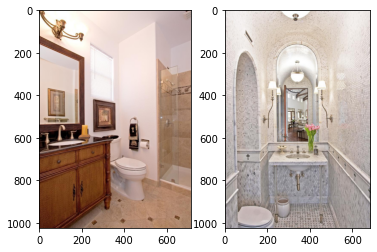

In [2]:
img1 = image.imread("/home/user/Downloads/ADE20K_2016_07_26/images/training/images/ADE_train_00000007.jpg")
img2 = image.imread("/home/user/Downloads/ADE20K_2016_07_26/images/training/images/ADE_train_00000010.jpg")

from matplotlib import pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(img1.asnumpy())

plt.subplot(1, 2, 2)
plt.imshow(img2.asnumpy())

plt.show()

In [3]:
from gluoncv.data.transforms.presets.segmentation import test_transform
img1 = test_transform(img1, ctx)
img2 = test_transform(img2, ctx)

In [4]:
model = gluoncv.model_zoo.get_model('fcn_resnet101_ade', pretrained=True)

In [5]:
output1 = model.predict(img1)
output2 = model.predict(img2)
predict1 = mx.nd.squeeze(mx.nd.argmax(output1, 1)).asnumpy()
predict2 = mx.nd.squeeze(mx.nd.argmax(output2, 1)).asnumpy()

In [6]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask1 = get_color_pallete(predict1, 'fcn_ade')
mask2 = get_color_pallete(predict2, 'fcn_ade')
mask1.save('output1.png')
mask2.save('output2.png')

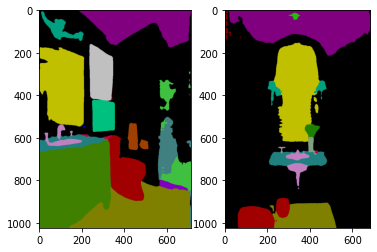

In [7]:
mask1 = mpimg.imread('output1.png')

plt.subplot(1, 2, 1)
plt.imshow(mask1)

plt.subplot(1, 2, 2)
plt.imshow(mask2)

plt.show()

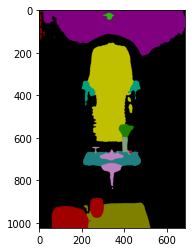

In [8]:
mask2 = mpimg.imread('output2.png')

plt.imshow(mask2)

plt.show()